ASSIGNMENT 1 PART 2 \
TASK 2
-

Importations and Definition of Functions

In [2]:
# Important libraries
from __future__ import division
import errno
from sklearn.feature_extraction.text import TfidfVectorizer
import csv, os, codecs, fnmatch
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from operator import itemgetter
import numpy as np
import pandas as pd
from sklearn import svm

data_path="drive/My Drive/Colab Notebooks"
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
n_features = 190
gmv = 0.001 # 0.001 # 0.05 # 0.1 # 0.5 # 0.1, 0.05, 0.01, 0.005, 0.001
nuv = 0.001 # 0.1, 0.05, 0.01, 0.005, 0.001

In [4]:
# FUNCTIONAL JS/
usefulJSpaths = [] # absolute path of functional Javascript codes
usefulJSfiles = [] # list of file names
rusefulJSfiles = [] # list of opened files
for root, dirnames, filenames, in os.walk(f"{data_path}/MQClass/Assign-2/CODE/LabelledDataSet/LabelledDataSet/functionalJS"):
    for filename in fnmatch.filter(filenames, "*.js"):
        usefulJSfiles.append(filename)
        usefulJSpaths.append(os.path.join(root, filename))
        try:
            with codecs.open(os.path.join(root, filename),encoding="latin1") as f: # No need to specify 'r': this is the default.
                rusefulJSfiles.append(f.read()) # inline Cosine similarity, Cosine does work on whole doc so no .split()
        except IOError as exc:
            if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
                raise # Propagate other kinds of IOError.

print ("Number of useful JS files: %s " % len(rusefulJSfiles))

Number of useful JS files: 1123 


In [5]:
# TRACKING JS
uselessJSpaths = [] # absolute path of tracking Javascript codes
uselessJSfiles = []
ruselessJSfiles = [] # list of opened files
for ulessroot, ulessdirnames, ulessfilenames, in os.walk(f"{data_path}/MQClass/Assign-2/CODE/LabelledDataSet/LabelledDataSet/trackingJS"):
    for filename in fnmatch.filter(ulessfilenames, "*.js"):
        uselessJSfiles.append(filename)
        uselessJSpaths.append(os.path.join(ulessroot, filename))
        try:
            with codecs.open(os.path.join(ulessroot, filename),encoding="latin1") as f: # No need to specify 'r': this is the default.
                ruselessJSfiles.append(f.read()) # inline Cosine similarity, Cosine does work on whole doc so no .split()
        except IOError as exc:
            if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
                raise # Propagate other kinds of IOError.

print ("Number of useless JS files: %s " % len(ruselessJSfiles))

Number of useless JS files: 1489 


In [6]:
print ("useful JS vs useless JS (ratio) : %s " % (len(rusefulJSfiles)/len(ruselessJSfiles)))

useful JS vs useless JS (ratio) : 0.7541974479516454 


TF-IDF // TERM FREQUENCE - INVERSE DOCUMENT FREQUENCY SECTION
-
- Collecting all the files then converting them into TF-IDF vectors to supply for the SVM model.
- Converting useful and useless files to TF-IDF vectors to train and test One Class SVM and K-Means (Selected for PU Learning).
- Also provided a true label for the dataset.

Collecting all the files

In [8]:
# GETTING ALL FILES
JSpaths = [] # absolute path of tracking Javascript codes
JSfiles = []
rJSfiles = [] # list of opened files
for root, dirnames, filenames, in os.walk(f"{data_path}/MQClass/Assign-2/CODE/LabelledDataSet/LabelledDataSet/"):
    for filename in fnmatch.filter(filenames, "*.js"):
        JSfiles.append(filename)
        JSpaths.append(os.path.join(root, filename))
        try:
            with codecs.open(os.path.join(root, filename),encoding="latin1") as f: # No need to specify 'r': this is the default.
                rJSfiles.append(f.read()) # inline Cosine similarity, Cosine does work on whole doc so no .split()
        except IOError as exc:
            if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
                raise # Propagate other kinds of IOError.

print ("Number of JS files: %s " % len(rJSfiles))

Number of JS files: 2612 


TF-IDF Conversion

In [9]:
# (A,B) C
# A: Document index
# B: Specific word-vector index
# C: TFIDF score for word B in document A

tfidf=TfidfVectorizer(use_idf=True,max_features=n_features)
vectors=tfidf.fit_transform(rJSfiles)

print(vectors)

  (0, 33)	0.038271432770858656
  (0, 12)	0.0429989602173903
  (0, 11)	0.04423190928522246
  (0, 173)	0.03768475689235232
  (0, 149)	0.044921516470595745
  (0, 69)	0.03148508957837281
  (0, 151)	0.03813292815444132
  (0, 102)	0.06430353609573007
  (0, 136)	0.10604538800339051
  (0, 58)	0.06415946678608495
  (0, 164)	0.2617849560903645
  (0, 85)	0.13039196797717068
  (0, 127)	0.039735850407763576
  (0, 61)	0.16657071113096195
  (0, 52)	0.055311902165597455
  (0, 188)	0.057983331579407875
  (0, 152)	0.03272311951129556
  (0, 144)	0.07626585630888263
  (0, 154)	0.056994042650252416
  (0, 82)	0.03261930816999282
  (0, 83)	0.07947170081552715
  (0, 38)	0.2495563220906151
  (0, 90)	0.7127317383237166
  (0, 142)	0.060304641924454935
  (0, 41)	0.04637987850785304
  :	:
  (2611, 173)	0.020942308353587444
  (2611, 149)	0.00534941707707263
  (2611, 69)	0.10373225568374238
  (2611, 151)	0.00605467648453578
  (2611, 102)	0.10720497560774576
  (2611, 136)	0.04630365427753688
  (2611, 58)	0.1451664972

In [10]:
vectors_useful=tfidf.fit_transform(rusefulJSfiles)
vectors_useless=tfidf.fit_transform(ruselessJSfiles)

DataFrame Conversion

In [11]:
c = vectors.tocoo()
f = vectors_useful.tocoo()
l = vectors_useless.tocoo()

data = pd.DataFrame({"Document": c.row, "Word": c.col, "Weight": c.data})
data_useful = pd.DataFrame({"Document": f.row, "Word": f.col, "Weight": f.data})
data_useless = pd.DataFrame({"Document": l.row, "Word": l.col, "Weight": l.data})

data

# Documents < 1122 is functional

,Document,Word,Weight
0,0,33,0.038271
1,0,12,0.042999
2,0,11,0.044232
3,0,173,0.037685
4,0,149,0.044922
...,...,...,...
125979,2611,104,0.001400
125980,2611,175,0.022182
125981,2611,177,0.017503
125982,2611,182,0.218700


Adding True Labels
- Labels are used for testing phase

In [12]:
# 1 = functional
# 0 = tracking
data['Type'] = np.where(data['Document'] <= 1123 , 1, -1)
data_useful['Type'] = 1
data_useless['Type'] = -1

data

,Document,Word,Weight,Type
0,0,33,0.038271,1
1,0,12,0.042999,1
2,0,11,0.044232,1
3,0,173,0.037685,1
4,0,149,0.044922,1
...,...,...,...,...
125979,2611,104,0.001400,-1
125980,2611,175,0.022182,-1
125981,2611,177,0.017503,-1
125982,2611,182,0.218700,-1


Splitting entire data set for training and testing sets

In [13]:
# Training Phase
from sklearn.model_selection import train_test_split
# X = data.drop(['Document'], axis=1, inplace=False)
columns = ['Document','Word']
X = data[columns]
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

X

training data feature shape: (94488, 2)
training data label shape: (94488,)
test data feature space shape: (31496, 2)
test data label shape: (31496,)


,Document,Word
0,0,33
1,0,12
2,0,11
3,0,173
4,0,149
...,...,...
125979,2611,104
125980,2611,175
125981,2611,177
125982,2611,182


In [14]:
columns = ['Document','Word','Type']
X_train_ocsvm = data_useful[columns].sample(frac=0.8)
y_train_ocsvm = data_useful['Type']

X_test_ocsvm = pd.concat([data_useless[columns],X_train_ocsvm.sample(frac=0.2)],ignore_index=True)
y_test_ocsvm = X_test_ocsvm['Type']

X_train_ocsvm = X_train_ocsvm.drop('Type',axis=1)
X_test_ocsvm = X_test_ocsvm.drop('Type',axis=1)
X_test_ocsvm

,Document,Word
0,0,98
1,0,97
2,0,113
3,0,84
4,0,34
...,...,...
79923,727,165
79924,72,174
79925,289,72
79926,1029,174


One Class SVM Model
- Unsupervised SVM algorithm

OCSVM - Training

In [15]:
# Testing Phase
# TAKES 6 MINUTES TO RUN
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM().fit(X_train_ocsvm)
ocsvm

# has 50% contamination as default

OneClassSVM()

OCSVM - Testing

In [16]:
# TAKES 2 MINUTES TO RUN
predictions_ocsvm = ocsvm.predict(X_test_ocsvm)
predictions_ocsvm

array([-1, -1, -1, ...,  1, -1, -1])

In [17]:
# TAKES 2 MINS TO RUN
score = ocsvm.score_samples(X_test_ocsvm)
score

array([ 8798.17712491,  8798.29084113,  8786.48201853, ...,
       10959.59027687,  9475.36486916,  8593.76729345])

In [18]:
y_test_ocsvm

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
79923    1
79924    1
79925    1
79926    1
79927    1
Name: Type, Length: 79928, dtype: int64

In [19]:
print(classification_report(y_test_ocsvm, predictions_ocsvm))

              precision    recall  f1-score   support

          -1       0.91      0.65      0.76     71314
           1       0.15      0.50      0.23      8614

    accuracy                           0.63     79928
   macro avg       0.53      0.57      0.49     79928
weighted avg       0.83      0.63      0.70     79928



In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_ocsvm, predictions_ocsvm)
print("Thresholds: ",thresholds)
print("FPR: ",fpr)
print("TPR: ",tpr)

print("AUC: ",metrics.auc(fpr, tpr))
print(metrics.confusion_matrix(y_test_ocsvm, predictions_ocsvm))

Thresholds:  [ 2  1 -1]
FPR:  [0.         0.35209075 1.        ]
TPR:  [0.         0.49907128 1.        ]
AUC:  0.5734902628720113
[[46205 25109]
 [ 4315  4299]]


In [21]:
len(predictions_ocsvm)

79928

       Document  Word  Type  Predictions
0             0    98    -1           -1
1             0    97    -1           -1
2             0   113    -1           -1
3             0    84    -1           -1
4             0    34    -1           -1
...         ...   ...   ...          ...
79923       727   165     1            1
79924        72   174     1           -1
79925       289    72     1            1
79926      1029   174     1           -1
79927      1107   158     1           -1

[79928 rows x 4 columns]


Text(0, 0.5, 'Word')

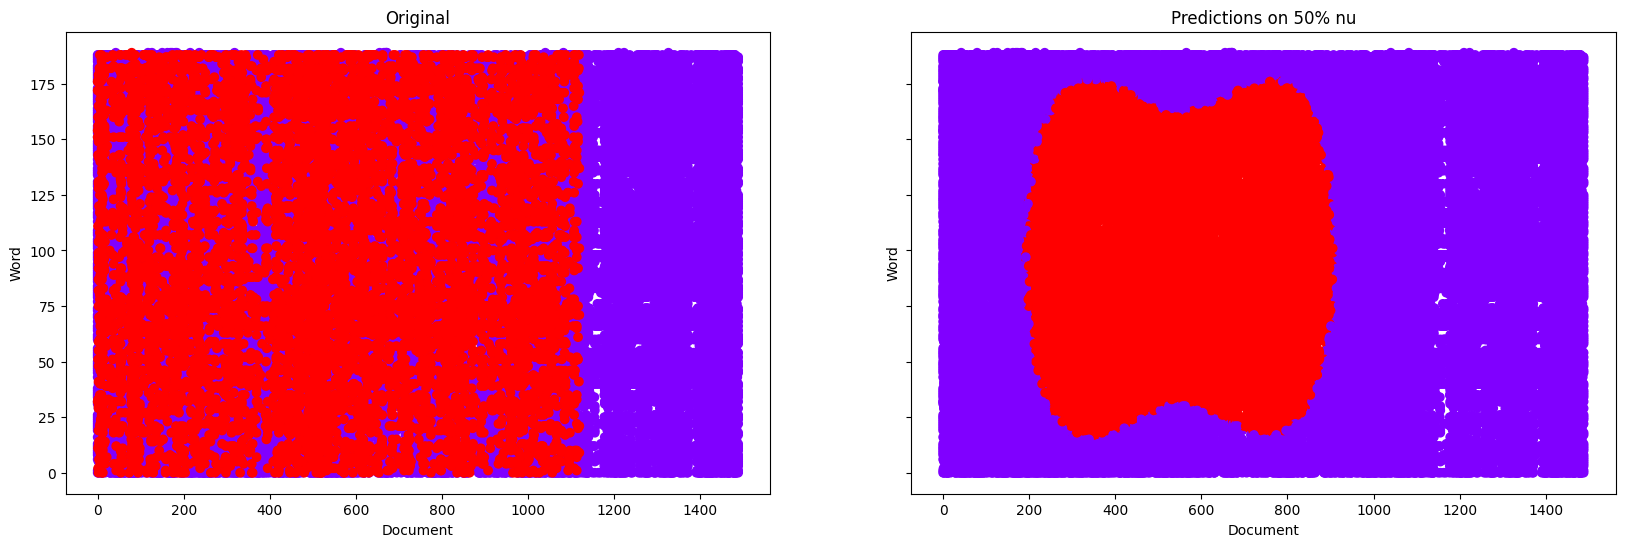

In [22]:
from matplotlib import pyplot as plt

# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test_ocsvm, columns=['Document', 'Word'])
df_test['Type'] = y_test_ocsvm
df_test['Predictions'] = predictions_ocsvm
print(df_test)
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))
# Original
ax0.set_title('Original')
ax0.scatter(df_test['Document'], df_test['Word'], c=df_test['Type'], cmap='rainbow')
ax0.set_xlabel("Document")
ax0.set_ylabel("Word")
# Predictions
ax1.set_title('Predictions on 50% nu')
ax1.scatter(df_test['Document'], df_test['Word'], c=df_test['Predictions'], cmap='rainbow')
ax1.set_xlabel("Document")
ax1.set_ylabel("Word")

OCSVM - Training and Testing pt. 2
- Readjusting contamination value for better results

In [23]:
score_threshold = np.percentile(score, 70) # percent of how sensitive the model is in classifying outliers/anomalies

adjusted_prediction = [-1 if i < score_threshold else 1 for i in score]

print(classification_report(y_test_ocsvm, adjusted_prediction))

# 5% has a better precision and accuracy

              precision    recall  f1-score   support

          -1       0.91      0.71      0.80     71314
           1       0.15      0.41      0.21      8614

    accuracy                           0.68     79928
   macro avg       0.53      0.56      0.51     79928
weighted avg       0.83      0.68      0.74     79928



In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_ocsvm, adjusted_prediction)
print("Thresholds: ",thresholds)
print("FPR: ",fpr)
print("TPR: ",tpr)

print("AUC: ",metrics.auc(fpr, tpr))
print(metrics.confusion_matrix(y_test_ocsvm, adjusted_prediction))

Thresholds:  [ 2  1 -1]
FPR:  [0.         0.28725075 1.        ]
TPR:  [0.         0.40561876 1.        ]
AUC:  0.5591840049772782
[[50829 20485]
 [ 5120  3494]]


       Document  Word  Type  Predictions  Predictions_2
0             0    98    -1           -1             -1
1             0    97    -1           -1             -1
2             0   113    -1           -1             -1
3             0    84    -1           -1             -1
4             0    34    -1           -1             -1
...         ...   ...   ...          ...            ...
79923       727   165     1            1              1
79924        72   174     1           -1             -1
79925       289    72     1            1              1
79926      1029   174     1           -1             -1
79927      1107   158     1           -1             -1

[79928 rows x 5 columns]


Text(0, 0.5, 'Word')

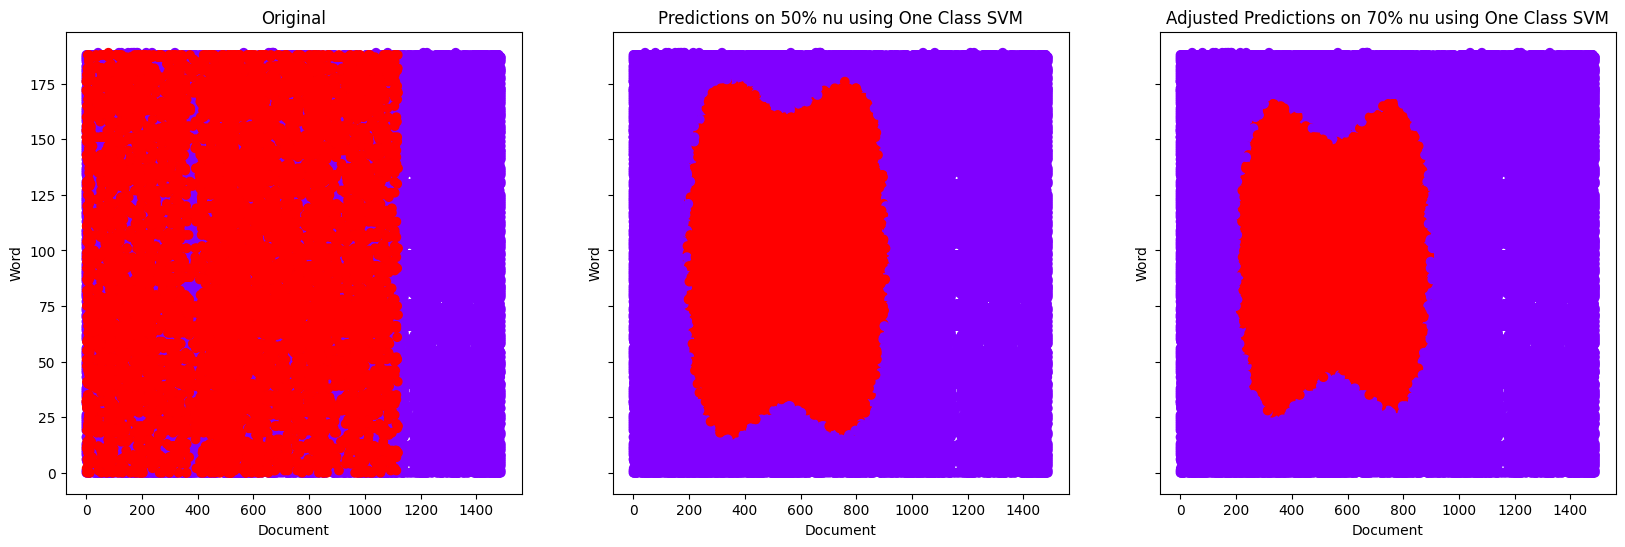

In [25]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test_ocsvm, columns=['Document', 'Word'])
df_test['Type'] = y_test_ocsvm
df_test['Predictions'] = predictions_ocsvm
df_test['Predictions_2'] = adjusted_prediction
print(df_test)
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Original
ax0.set_title('Original')
ax0.scatter(df_test['Document'], df_test['Word'], c=df_test['Type'], cmap='rainbow')
ax0.set_xlabel("Document")
ax0.set_ylabel("Word")
# Predictions
ax1.set_title('Predictions on 50% nu using One Class SVM')
ax1.scatter(df_test['Document'], df_test['Word'], c=df_test['Predictions'], cmap='rainbow')
ax1.set_xlabel("Document")
ax1.set_ylabel("Word")
# Adjusted Predictions
ax2.set_title('Adjusted Predictions on 70% nu using One Class SVM')
ax2.scatter(df_test['Document'], df_test['Word'], c=df_test['Predictions_2'], cmap='rainbow')
ax2.set_xlabel("Document")
ax2.set_ylabel("Word")

For findings, comparison, and summary, please refer to the report.

K-MEANS CLUSTERING
-
- Unsupervised clustering algorithm
- As a standard, I will be using k=2

K-Means - Training

In [26]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=2).fit(X_test_ocsvm)
kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

K-Means - Testing

In [27]:
predictions_kmeans = kmeans.predict(X_test_ocsvm)
predictions_kmeans

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [28]:
predictions_kmeans = [-1 if i == 0 else 1 for i in predictions_kmeans]
# predictions_kmeans

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_ocsvm, predictions_kmeans)
print("Thresholds: ",thresholds)
print("FPR: ",fpr)
print("TPR: ",tpr)

print("AUC: ",metrics.auc(fpr, tpr))
print(metrics.confusion_matrix(y_test_ocsvm, predictions_kmeans))

Thresholds:  [ 2  1 -1]
FPR:  [0.         0.51585944 1.        ]
TPR:  [0.         0.68771767 1.        ]
AUC:  0.5859291151858289
[[34526 36788]
 [ 2690  5924]]


       Document  Word  Type  Predictions
0             0    98    -1            1
1             0    97    -1            1
2             0   113    -1            1
3             0    84    -1            1
4             0    34    -1            1
...         ...   ...   ...          ...
79923       727   165     1            1
79924        72   174     1            1
79925       289    72     1            1
79926      1029   174     1           -1
79927      1107   158     1           -1

[79928 rows x 4 columns]


Text(0, 0.5, 'Word')

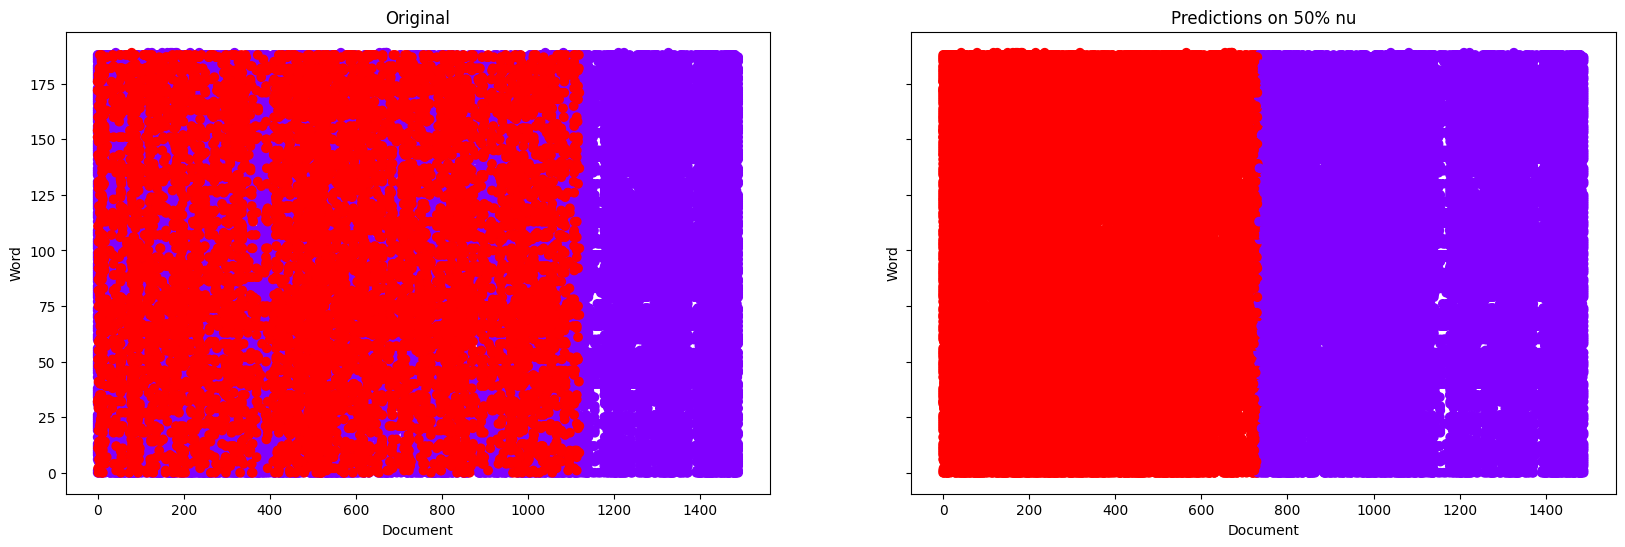

In [30]:
from matplotlib import pyplot as plt

# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test_ocsvm, columns=['Document', 'Word'])
df_test['Type'] = y_test_ocsvm
df_test['Predictions'] = predictions_kmeans
print(df_test)
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))
# Original
ax0.set_title('Original')
ax0.scatter(df_test['Document'], df_test['Word'], c=df_test['Type'], cmap='rainbow')
ax0.set_xlabel("Document")
ax0.set_ylabel("Word")
# Predictions
ax1.set_title('Predictions on 50% nu')
ax1.scatter(df_test['Document'], df_test['Word'], c=df_test['Predictions'], cmap='rainbow')
ax1.set_xlabel("Document")
ax1.set_ylabel("Word")

Please refer to the report for findings.

SVC (Baseline SVM) Model
-
- Supervised SVM algorithm

SVC - Training

In [31]:
svc = svm.SVC(probability=True, kernel='rbf')
svc.fit(X_train, y_train)
svc

SVC(probability=True)

SVC - Testing

In [32]:
predictions_svc = svc.predict(X_test)
predictions_svc

array([-1, -1, -1, ..., -1,  1, -1])

In [33]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     17976
           1       1.00      1.00      1.00     13520

    accuracy                           1.00     31496
   macro avg       1.00      1.00      1.00     31496
weighted avg       1.00      1.00      1.00     31496



In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_svc)
print("Thresholds: ",thresholds)
print("FPR: ",fpr)
print("TPR: ",tpr)

print("AUC: ",metrics.auc(fpr, tpr))
print(metrics.confusion_matrix(y_test, predictions_svc))

Thresholds:  [ 2  1 -1]
FPR:  [0. 0. 1.]
TPR:  [0.         0.99607988 1.        ]
AUC:  0.9980399408284024
[[17976     0]
 [   53 13467]]


SVC has a high score. This could mean that it is overfit. I will use cross validation to check this.

In [35]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(svc, X, y, scoring = 'accuracy', cv=10)
cv_score.mean()

0.9571698268147767

       Document  Word  Type  Predictions
54710      1153    38    -1           -1
81004      1641   157    -1           -1
79560      1616   188    -1           -1
85980      1728   120    -1           -1
97586      2013   189    -1           -1
...         ...   ...   ...          ...
27397       553   162     1            1
66435      1365    48    -1           -1
80408      1635   102    -1           -1
7311        158   163     1            1
66592      1368   140    -1           -1

[31496 rows x 4 columns]


Text(0, 0.5, 'Word')

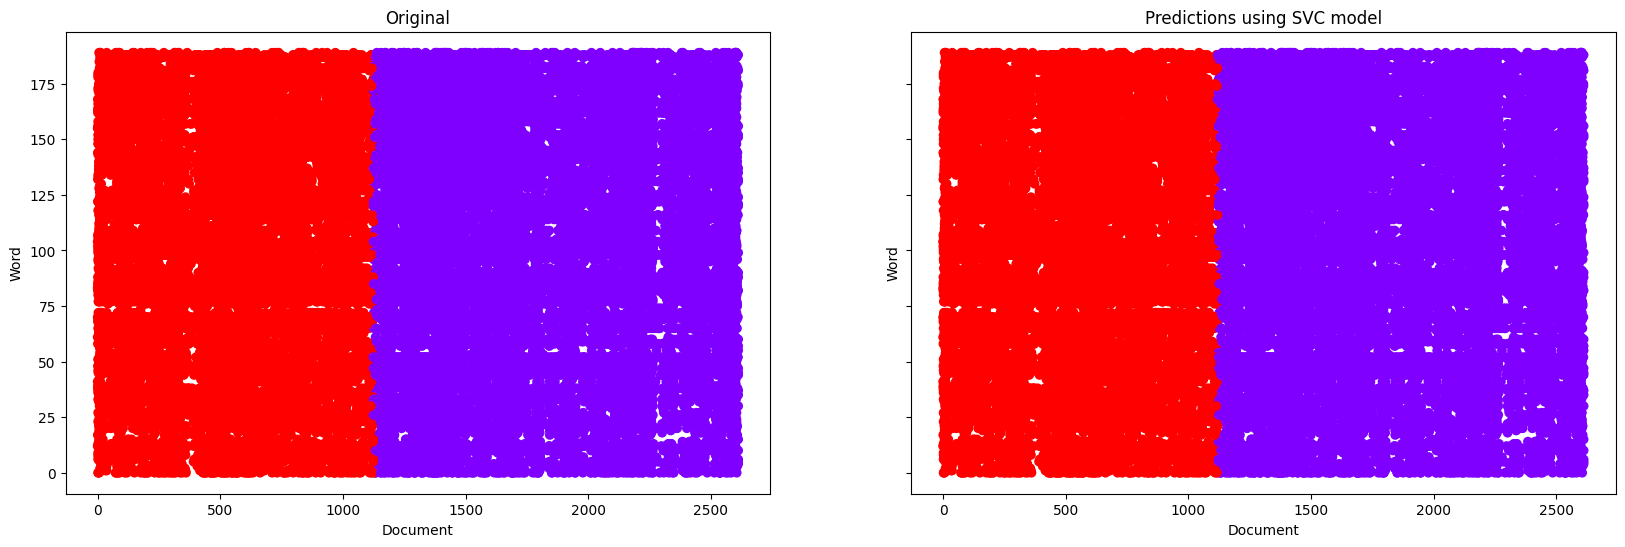

In [36]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Document', 'Word'])
df_test['Type'] = y_test
df_test['Predictions'] = predictions_svc
print(df_test)
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))
# Original
ax0.set_title('Original')
ax0.scatter(df_test['Document'], df_test['Word'], c=df_test['Type'], cmap='rainbow')
ax0.set_xlabel("Document")
ax0.set_ylabel("Word")
# Predictions
ax1.set_title('Predictions using SVC model')
ax1.scatter(df_test['Document'], df_test['Word'], c=df_test['Predictions'], cmap='rainbow')
ax1.set_xlabel("Document")
ax1.set_ylabel("Word")

Please refer to the report for findings.